In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# 1. Introduction to image processing

## 1.1 First Manipulations

####  Loads and visualizes the first image

<class 'numpy.ndarray'> (911, 922, 3) uint8


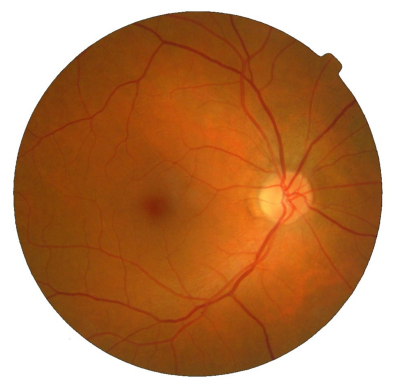

In [2]:
retina = io.imread('images/retine.png')
plt.imshow(retina)
plt.axis('off')
print(type(retina), retina.shape, retina.dtype)

The image is a `numpy.ndarray` of `unsigned int 8-bit` and has for dimension `(911, 922, 3)`.

#### Visualizes the green channel

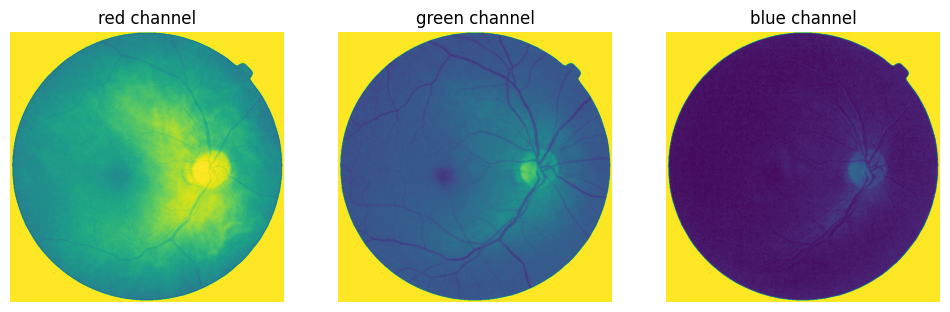

In [3]:
_, ax = plt.subplots(1,3, figsize=(12,4))

for i, title in enumerate(['red', 'green', 'blue']):
    ax[i].imshow(retina[:,:,i])
    ax[i].axis('off')
    ax[i].set_title(title+' channel')

A color image is constituted of (generally) three channels. This representation follows the human visual
perception principles: in the human retina, the sensitive cells (the cones) react to specific wavelength that
correspond to red, green and blue. The sensors technology adopted the *same* characteristics and a so-called
***Bayer filter*** has 2 green filters for 1 red and 1 blue. Consequently, the green channel presents a better resolution
than the other channels.

Different image formats can be used, the most common are :
- JPEG, standard and universal format, samples colors more strongly
- PNG the ideal format for interactive documents such as web pages, but it is not suitable for printing
- GIF very common in their animated form 
- WebP successor of PNG created by Google
- HEIF, allows to have an image 50% lighter than the same image in JPEG.
- SVG format for vector images

#### Displaying qualities of an image

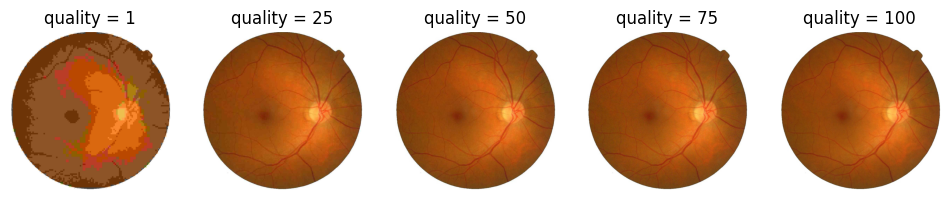

In [4]:
# Display
quality = [1, 25, 50, 75, 100]
filename = ['test/test'+str(i)+'.jpg' for i in range(1, len(quality)+1)]
_, ax = plt.subplots(1,len(quality),figsize=(12,3))

for i in range(len(quality)):
    io.imsave(filename[i], retina, extension='.jpg', quality=quality[i])    # Writing image
    ax[i].imshow(io.imread(filename[i]))
    ax[i].axis('off')
    ax[i].set_title('quality = '+str(quality[i]))

## 1.2 Color quantization

#### Grey reduction

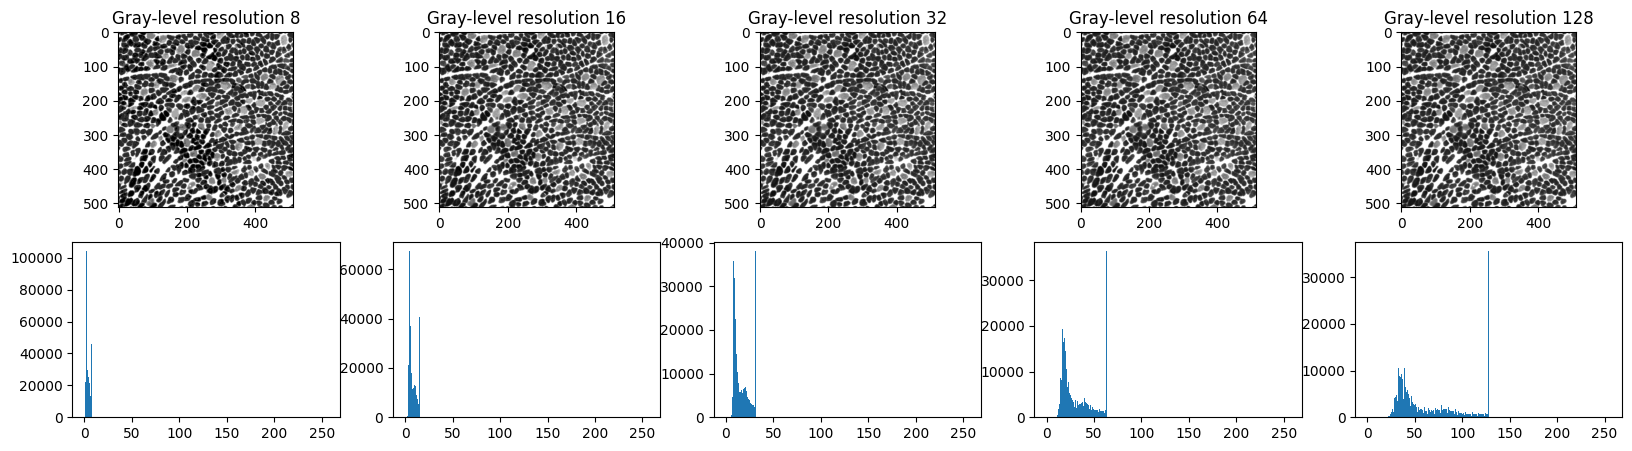

In [5]:
muscle = io.imread('images/muscle.jpg', )
plt.figure(figsize=(20, 5))

for i, k in enumerate([8,16,32,64,128]):
 reducedImage = muscle//(256/k)
 plt.subplot(2, 5, i+1)
 plt.imshow(reducedImage, cmap='gray')
 plt.title('Gray-level resolution '+str(k))
 plt.subplot(2, 5, i+6)
 plt.hist(reducedImage.flatten(), 256, range=(0,256))

## 1.3. Image histogram

In [6]:
def compute_histogram(image):
    tab = np.zeros((256,), dtype='int')
    X, Y = image.shape
    for i in range(X):
        for j in range(Y) :
            tab[image[i,j]]+=1
    return tab

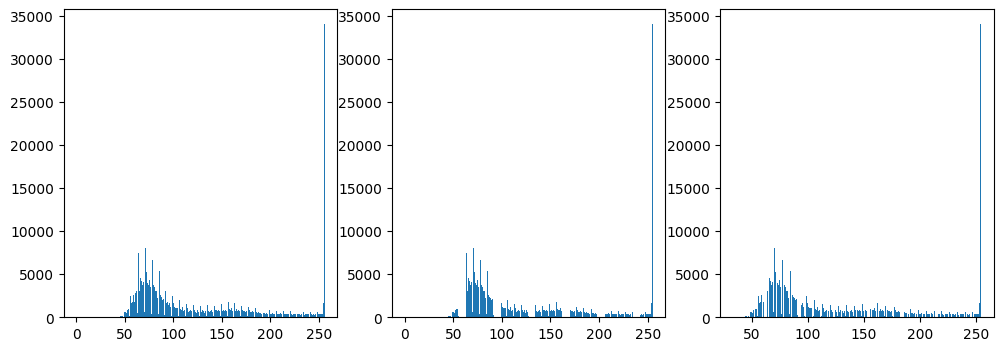

In [7]:
_,ax = plt.subplots(1,3, figsize=(12, 4))

ax[0].hist(muscle.flatten(), 256, range=(0,256))
h = compute_histogram(muscle)
ax[1].bar(range(0,256), h)
h2, edges = np.histogram(muscle, bins=256)
ax[2].bar(edges[:-1], h2)
plt.show()
